### Install Packages

In [ ]:
# !pip install pymysql
# !pip install ipython-sql
# !pip install mysqlclient
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install pmdarima
# !pip install mlxtend
# !pip install networkx

### Setting up the mysql connection

In [1]:
import pymysql
import pandas as pd
import numpy as np

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='u573996896_scanwich')

## Dummy Query to test
## df=pd.read_sql_query("SELECT count(*) FROM users;",conn)

ModuleNotFoundError: No module named 'pymysql'

### Imports

In [13]:
# Import the visualization Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Last Month's Traffic - Supplier Wise

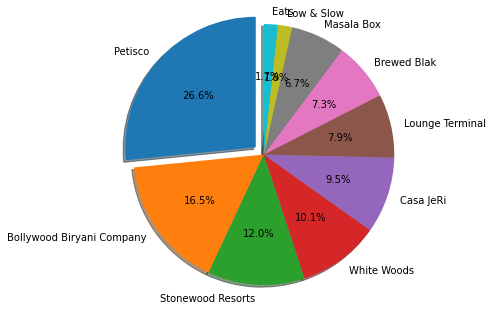

In [140]:
df=pd.read_sql_query(
    "SELECT COUNT(*) AS page_counter ,users.name, v.supplier_id,MONTH(v.created_at), ROUND(COUNT(*)/(SELECT COUNT(*) FROM visitor_logs AS t WHERE MONTH(t.created_at) = MONTH(CURRENT_DATE()) - 1 AND YEAR(t.created_at) = YEAR(CURRENT_DATE())) * 100,2) AS percentage_of_total_traffic FROM visitor_logs AS v join users ON v.supplier_id = users.id WHERE MONTH(v.created_at) = MONTH(CURRENT_DATE()) - 1 AND YEAR(v.created_at) = YEAR(CURRENT_DATE()) group BY v.supplier_id,Month(v.created_at) ORDER BY percentage_of_total_traffic desc limit 10;",conn)



# plotting the pie chart
plt.pie(df['percentage_of_total_traffic'], labels = df['name'],
        startangle=90, shadow = True, explode = (0.1, 0, 0, 0,0,0,0,0,0,0),
        radius = 1.2, autopct = '%1.1f%%')


# showing the plot
plt.show()

### Overall Traffic Scanwich

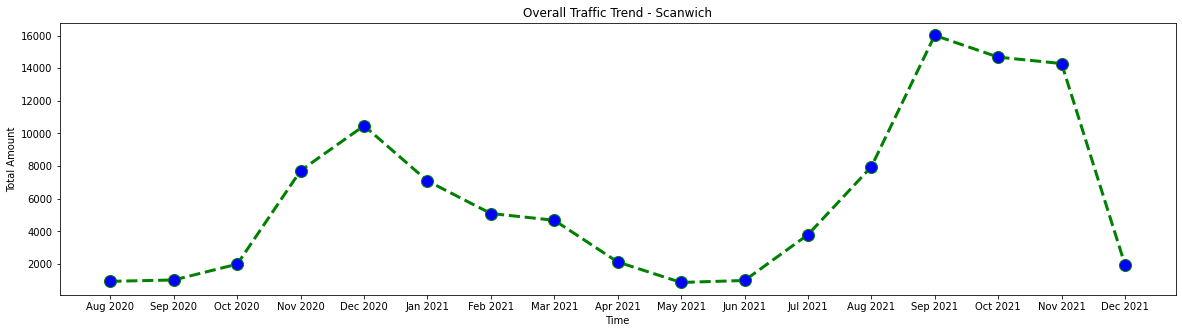

In [141]:
df=pd.read_sql_query("SELECT concat(SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label,YEAR(created_at) AS y, MONTH(created_at) AS m, MONTHNAME(created_at) AS month_name, COUNT(id) AS number_of_hits FROM visitor_logs  GROUP BY y, m , month_name,xaxis_label ORDER BY y,m ",conn)
df.to_clipboard(excel = True)
# plotting the points
plt.plot(df['xaxis_label'], df['number_of_hits'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Amount')
 
# giving a title to my graph
plt.title('Overall Traffic Trend - Scanwich')

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [20,5]
 
# function to show the plot
plt.show()

### Overall Order Month/Year Wise

20981.280000000002


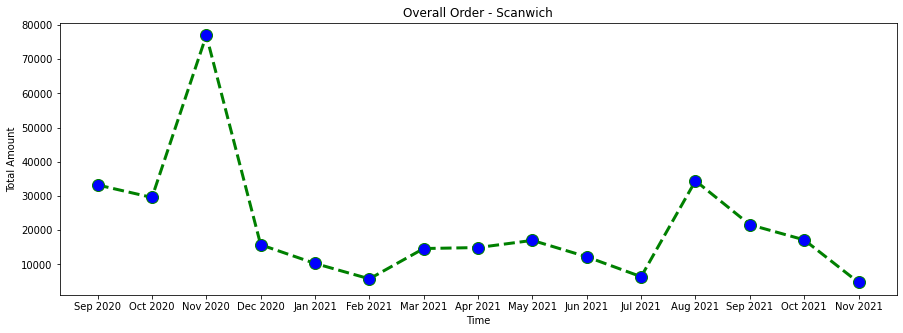

In [156]:
df=pd.read_sql_query("SELECT concat(SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label,YEAR(created_at) AS y, MONTH(created_at) AS m, MONTHNAME(created_at) AS month_name, COUNT(id) AS number_of_orders, SUM(total) AS total FROM orders GROUP BY y, m , month_name,xaxis_label ORDER BY y,m",conn)
print(df['total'].mean())
# plotting the points
plt.plot(df['xaxis_label'], df['total'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Amount')
 
# giving a title to my graph
plt.title('Overall Order - Scanwich')

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15,5]
 
# function to show the plot
plt.show()

### Supplier's Trend of Orders

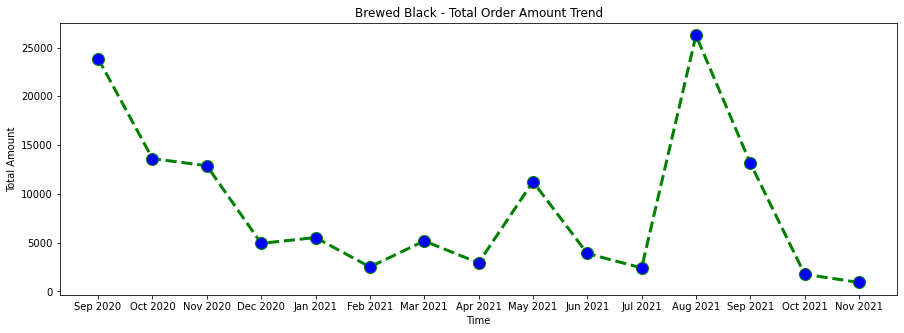

In [17]:
df=pd.read_sql_query("SELECT concat(SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label, YEAR(created_at) AS y, MONTH(created_at) AS m, MONTHNAME(created_at) AS month_name, COUNT(id) AS number_of_orders, SUM(total) AS total FROM orders where supplier_id = 1 GROUP BY y, m , month_name, xaxis_label ORDER BY y,m ",conn)

# plotting the points
plt.plot(df['xaxis_label'], df['total'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Amount')
 
# giving a title to my graph
plt.title('Brewed Black - Total Order Amount Trend')

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15,5]
 
# function to show the plot
plt.show()

## Suppliers EDA

### #1Daily traffic

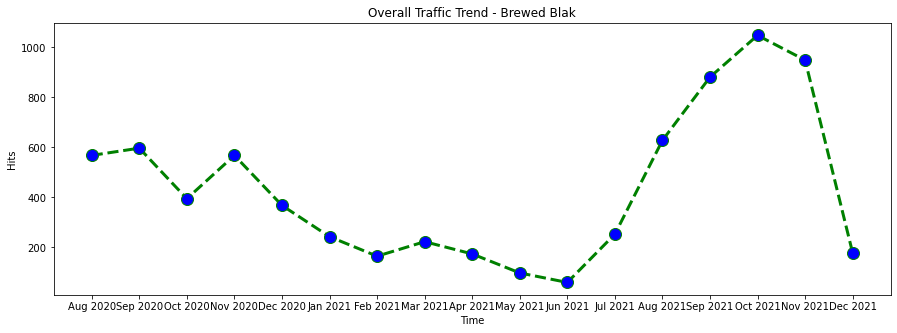

In [18]:
df=pd.read_sql_query("SELECT concat(SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label,YEAR(created_at) AS y, MONTH(created_at) AS m, MONTHNAME(created_at) AS month_name, COUNT(id) AS number_of_hits FROM visitor_logs  where supplier_id=1 GROUP BY y, m , month_name,xaxis_label ORDER BY y,m ",conn)
df
# plotting the points
plt.plot(df['xaxis_label'], df['number_of_hits'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Hits')
 
# giving a title to my graph
plt.title('Overall Traffic Trend - Brewed Blak')

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [20,5]
 
# function to show the plot
plt.show()

### 2. Best performing items - 3 or 5

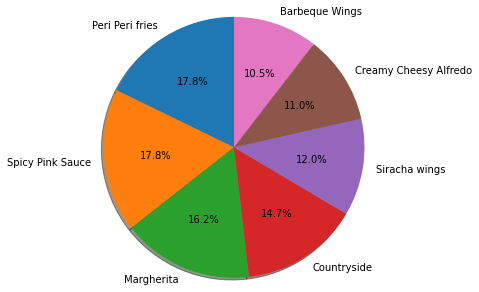

In [143]:
df=pd.read_sql_query(
    "SELECT COUNT(item_id) AS value,item_name AS name FROM order_items WHERE supplier_id = 1 group by item_id,item_name order by value desc limit 7;",conn)
df.to_clipboard(excel = True)
# plotting the pie chart
plt.pie(df['value'], labels = df['name'],
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')

 
# showing the plot
plt.show()

### 3. How many orders

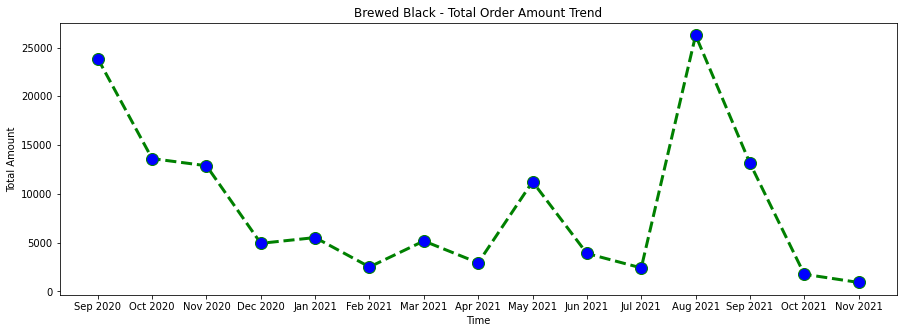

In [144]:
df=pd.read_sql_query("SELECT concat(SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label, YEAR(created_at) AS y, MONTH(created_at) AS m, MONTHNAME(created_at) AS month_name, COUNT(id) AS number_of_orders, SUM(total) AS total FROM orders where supplier_id = 1 GROUP BY y, m , month_name, xaxis_label ORDER BY y,m ",conn)
df.to_clipboard(excel = True)
# plotting the points
plt.plot(df['xaxis_label'], df['total'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Amount')
 
# giving a title to my graph
plt.title('Brewed Black - Total Order Amount Trend')

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15,5]
 
# function to show the plot
plt.show()

In [21]:
df=pd.read_sql_query("SELECT concat(DAY(created_at), ' ' , SUBSTR(MONTHNAME(created_at),1,3),' ',YEAR(created_at)) as xaxis_label, DAY(created_at) AS d,YEAR(created_at) AS y, MONTH(created_at) AS m, COUNT(id) AS number_of_hits FROM visitor_logs  where supplier_id=1 GROUP BY y, m ,d, xaxis_label",conn)
df.drop

,xaxis_label,d,y,m,number_of_hits
0,1 Aug 2020,1,2020,8,11
1,2 Aug 2020,2,2020,8,48
2,3 Aug 2020,3,2020,8,24
3,4 Aug 2020,4,2020,8,16
4,5 Aug 2020,5,2020,8,27
...,...,...,...,...,...
469,1 Dec 2021,1,2021,12,45
470,2 Dec 2021,2,2021,12,61
471,3 Dec 2021,3,2021,12,13
472,4 Dec 2021,4,2021,12,55


### Montly Conversion Rate

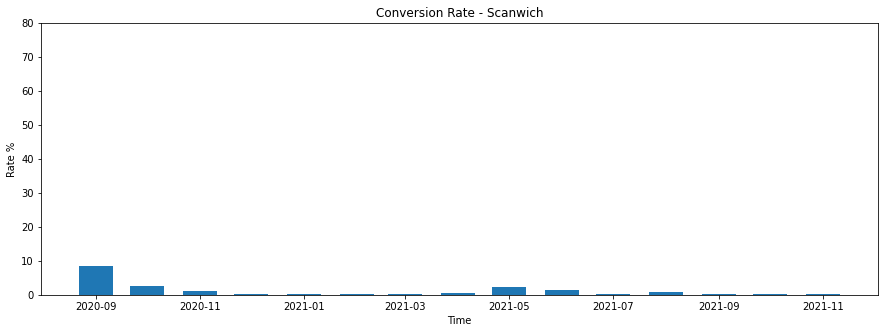

In [50]:
df = pd.read_excel (r'Book1.xlsx')
# plotting the points
plt.ylim(0,80)
plt.bar(df['xaxis_label'], df['rate'], width = 20)
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Rate %')

# giving a title to my graph
plt.title('Conversion Rate - Scanwich')

#

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [15,5]
 
# function to show the plot
plt.show()

### Traffic Trend and Forecasting

In [158]:
df = pd.read_excel("Book1.xlsx",sheet_name='Sheet4')
df.head()

,xaxis_label,number_of_hits
0,2020-08-01,11
1,2020-08-02,62
2,2020-08-03,90
3,2020-08-04,24
4,2020-08-05,45


In [169]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['number_of_hits'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = False,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5599.719, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5689.969, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5684.111, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5666.422, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5687.981, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5580.809, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5642.969, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5582.319, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5573.572, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5583.920, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5584.620, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5528.222, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5582.594, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5520.730, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  492
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2751.592
Date:                Tue, 21 Dec 2021   AIC                           5517.185
Time:                        23:36:44   BIC                           5546.560
Sample:                             0   HQIC                          5528.720
                                - 492                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4577      0.057     25.657      0.000       1.346       1.569
ar.L2         -1.2811      0.071    -18.059      0.000      -1.420      -1.142
ar.L3          0.2309      0.057      4.062      0.000       0.119       0.342
ma.L1         -1.9386      0.038    -51.084      0.000      -2.013      -1.864
ma.L2          1.8593      0.051     36.360      0.000       1.759       1.960
ma.L3         -0.7472      0.038    -19.591      0.000      -0.822      -0.672
sigma2      4414.1824    173.093     25.502      0.000    4074.927    4753.438
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               462.96
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

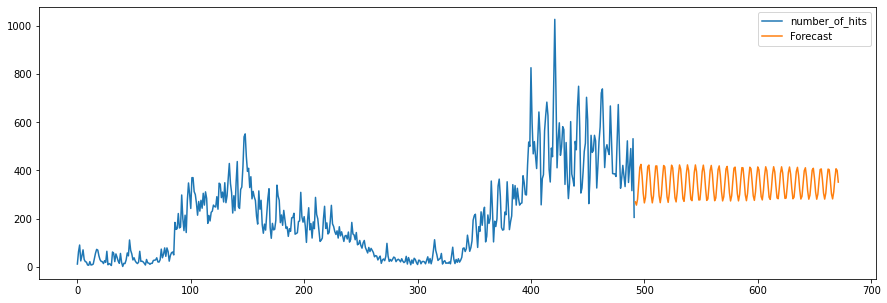

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['number_of_hits'], 
                        order = (3, 1, 3), 
                        seasonal_order =(0, 0, 0, 0))
result = model.fit()
  
# Forecast for the next 1 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 6*30, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['number_of_hits'].plot(figsize = (15, 5), legend = True)
forecast.plot(legend = True)
# forecast

In [178]:
# Split data into train / test sets
train = df.iloc[:len(df)-100]
test = df.iloc[len(df)-100:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['number_of_hits'], 
                order = (3, 1, 3), 
                seasonal_order =(0, 0, 0, 0))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         number_of_hits   No. Observations:                  392
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2028.491
Date:                Tue, 21 Dec 2021   AIC                           4070.983
Time:                        23:39:48   BIC                           4098.764
Sample:                             0   HQIC                          4081.994
                                - 392                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3742      0.097     14.189      0.000       1.184       1.564
ar.L2         -1.1521      0.123     -9.349      0.000      -1.394      -0.911
ar.L3          0.1351      0.093      1.459      0.145      -0.046       0.317
ma.L1         -1.8249      0.081    -22.600      0.000      -1.983      -1.667
ma.L2          1.6697      0.111     15.002      0.000       1.452       1.888
ma.L3         -0.5920      0.075     -7.884      0.000      -0.739      -0.445
sigma2      1870.8642    101.219     18.483      0.000    1672.479    2069.249
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.39
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.50
Prob(H) (two-sided):                  0.93   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

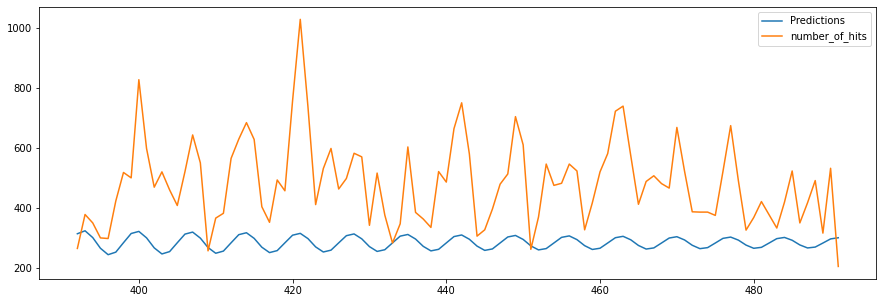

In [179]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['number_of_hits'].plot(legend = True)

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import math

In [4]:
df = pd.read_csv("recommendation_scanwich.csv", header=None)
df.head()
data  = []
for index, row in df.iterrows():
    array_row = []
    for elements in row.to_numpy():
        if str(elements) != 'nan':
            array_row.append(elements)
    data.append(array_row)

In [46]:
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,A5 Journal,A5 Sheets,A5 Sheets - Set of 5,A7 Thank you notes,AC issues,Accucheck glucometer,Afghani Soya Chaap,Air freshener,Airport Drop,Airport Pickup,...,White Hyper Striped Rayon (S),White Teal Floral Print (L),Wifi not working,Wild Turmeric & Shea Butter,Zesty Orange,new pasta,new pasta 2,paneer tikka,pasta,water And service
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df = apriori(df, min_support = 0.01, use_colnames = True, verbose = 1)
df

Processing 4 combinations | Sampling itemset size 4 32


,support,itemsets
0,0.012448,(Air freshener)
1,0.022822,(Arrabiata)
2,0.03527,(Barbeque Chicken)
3,0.022822,(Barbeque Chicken Burger)
4,0.041494,(Barbeque Wings)
...,...,...
70,0.012448,"(Mushroom Burger, Grilled Cotage Cheese, Peri ..."
71,0.012448,"(Mushroom Burger, Grilled Cotage Cheese, Salte..."
72,0.012448,"(Grilled Cotage Cheese, Salted fries, Peri Per..."
73,0.012448,"(Mushroom Burger, Salted fries, Peri Peri fries)"


In [48]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.90)
# df_ar.drop(df_ar[df_ar.confidence == 1].index, inplace=True)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Mushroom Burger, Grilled Cotage Cheese)",(Peri Peri fries),0.012448,0.070539,0.012448,1.0,14.176471,0.011570,inf
1,"(Grilled Cotage Cheese, Peri Peri fries)",(Mushroom Burger),0.012448,0.024896,0.012448,1.0,40.166667,0.012138,inf
2,"(Mushroom Burger, Grilled Cotage Cheese)",(Salted fries),0.012448,0.016598,0.012448,1.0,60.250000,0.012242,inf
3,"(Mushroom Burger, Salted fries)",(Grilled Cotage Cheese),0.012448,0.024896,0.012448,1.0,40.166667,0.012138,inf
4,"(Grilled Cotage Cheese, Salted fries)",(Mushroom Burger),0.012448,0.024896,0.012448,1.0,40.166667,0.012138,inf
5,"(Grilled Cotage Cheese, Salted fries)",(Peri Peri fries),0.012448,0.070539,0.012448,1.0,14.176471,0.011570,inf
6,"(Grilled Cotage Cheese, Peri Peri fries)",(Salted fries),0.012448,0.016598,0.012448,1.0,60.250000,0.012242,inf
7,"(Salted fries, Peri Peri fries)",(Grilled Cotage Cheese),0.012448,0.024896,0.012448,1.0,40.166667,0.012138,inf
8,"(Mushroom Burger, Salted fries)",(Peri Peri fries),0.012448,0.070539,0.012448,1.0,14.176471,0.011570,inf
9,"(Salted fries, Peri Peri fries)",(Mushroom Burger),0.012448,0.024896,0.012448,1.0,40.166667,0.012138,inf


In [8]:
import networkx as nx
from pandas.plotting import parallel_coordinates

In [ ]:
fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(df_ar,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

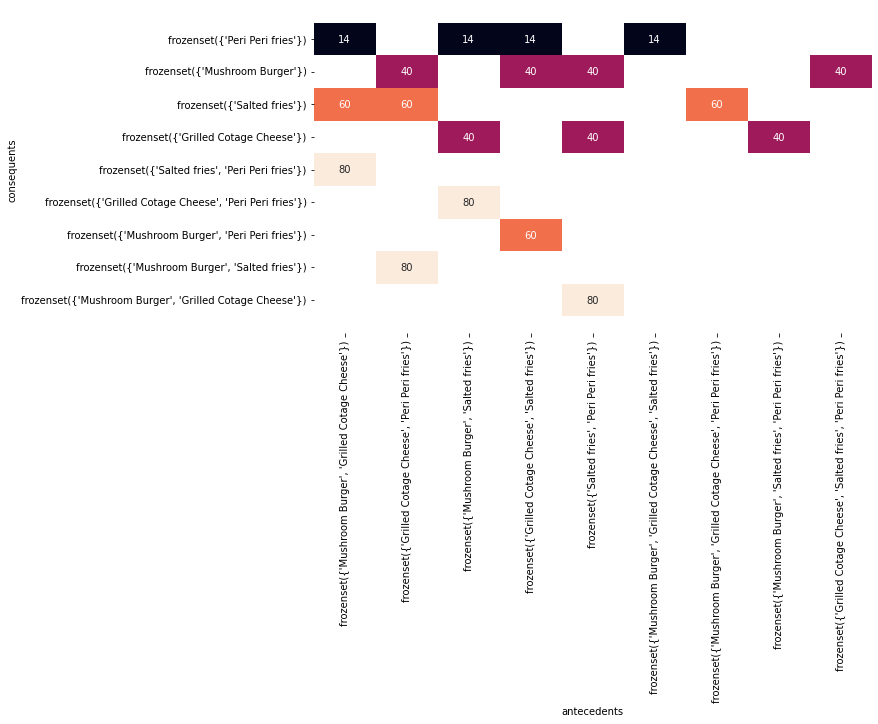

In [18]:
# Convert antecedents and consequents into strings
df_ar['antecedents'] = df_ar['antecedents']
df_ar['consequents'] = df_ar['consequents']

# Transform antecedent, consequent, and support columns into matrix
support_table = df_ar.pivot(index='consequents', columns='antecedents', values='lift')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 


### Linear Regression to Predict Orders

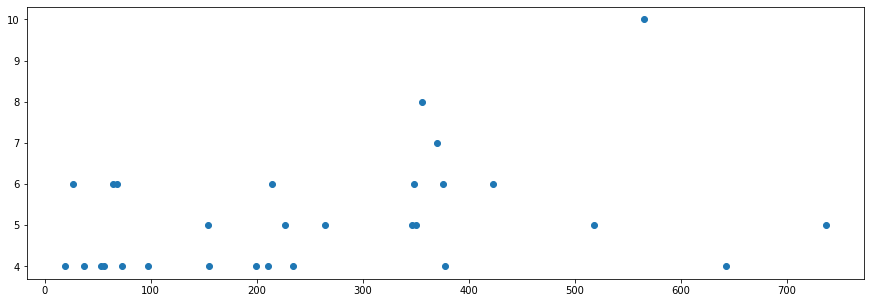

In [284]:

import statsmodels.api as sm

df_main = pd.read_csv("linear_regression.csv")
# plotting the original values
x = df_main['hits'].tolist()
y = df_main['order'].tolist()
plt.scatter(x, y)

### Treating Outlier with mean

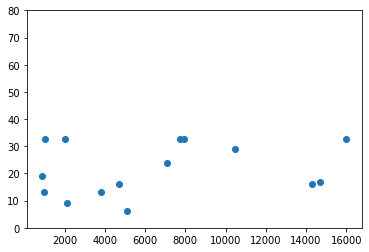

In [99]:
df_main.loc[df_main['orders']>45,'orders'] = df_main['orders'].mean()
# df_main.loc[df_main['hits']<4000,'hits'] = df_main['hits'].mean()
df_main
x = df_main['hits'].tolist()
y = df_main['orders'].tolist()
plt.ylim(0,80)
plt.scatter(x, y)


In [285]:
df_main.describe()

,hits,order
count,29.000000,29.000000
mean,260.793103,5.172414
std,193.476536,1.415954
min,19.000000,4.000000
25%,73.000000,4.000000
50%,227.000000,5.000000
75%,370.000000,6.000000
max,737.000000,10.000000


In [286]:
# defining the variables
x = df_main['hits'].tolist()
y = df_main['order'].tolist()

# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3.799
Date:                Wed, 22 Dec 2021   Prob (F-statistic):             0.0617
Time:                        00:47:15   Log-Likelihood:                -48.818
No. Observations:                  29   AIC:                             101.6
Df Residuals:                      27   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5021      0.426     10.578      0.0

### Predict Values

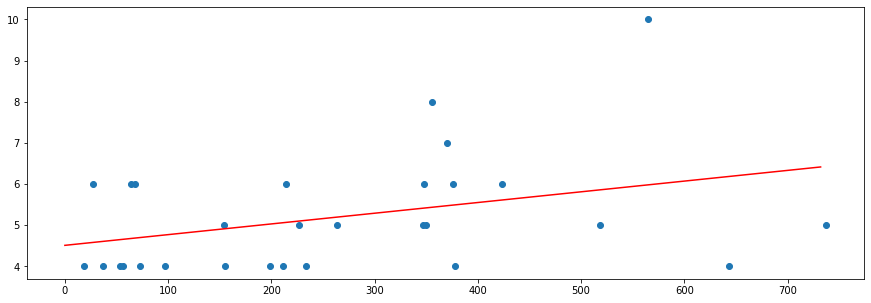

In [287]:
# reading data from the csv
data = pd.read_csv("linear_regression.csv")
  
# plotting the original values
x = data['hits'].tolist()
y = data['order'].tolist()
plt.scatter(x, y)
  
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = data['hits'].max()
min_x = data['order'].min()
  
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
  
# the substituted equation
y = 0.0026 * x + 4.5021
  
# plotting the regression line
plt.plot(y, 'r')
plt.show()

### Before Data Cleaning

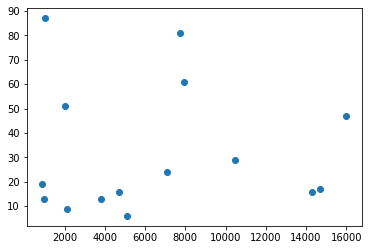

In [39]:
# reading data from the csv
data = pd.read_excel("Book1.xlsx",sheet_name='Sheet2')

# plotting the original values
x = data['hits'].tolist()
y = data['orders'].tolist()
plt.scatter(x, y)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
# reading data from the csv
data = pd.read_excel("Book1.xlsx",sheet_name='Sheet1')
  
# plotting the original values
x = np.array(data['hits']).reshape((-1, 1))
y = np.array(data['orders']).reshape((-1, 1))

In [91]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

In [293]:
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [492, 15]

In [189]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

df = pd.read_excel("Book1.xlsx",sheet_name='Sheet4')

In [204]:
model = pm.auto_arima(df.number_of_hits, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5599.719, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5689.969, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5684.111, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5666.422, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5687.981, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5580.809, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5642.969, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5582.319, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5573.572, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5583.920, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5584.620, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5528.222, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5582.594, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5520.730, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0]          

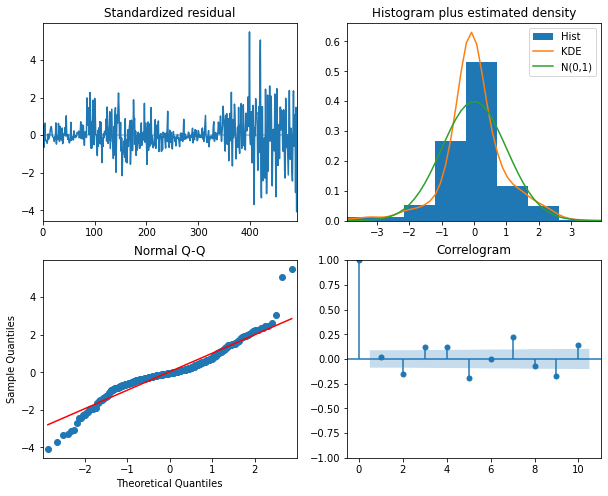

In [191]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

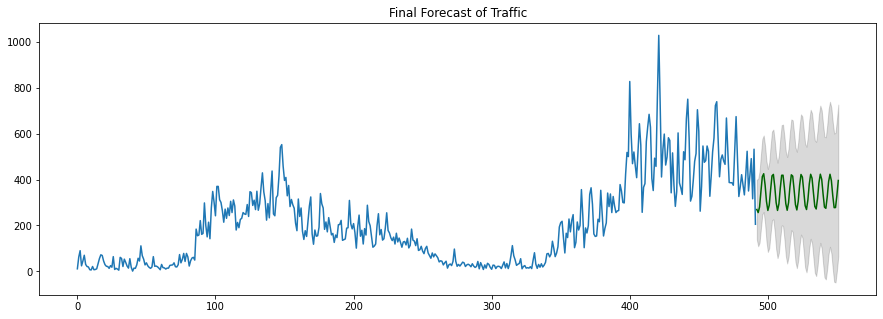

In [198]:
#Forecast
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.number_of_hits), len(df.number_of_hits)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.number_of_hits)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Traffic")
plt.show()

In [200]:
smodel = pm.auto_arima(df.number_of_hits, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5997.675, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5702.153, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5718.637, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5998.206, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5847.133, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5646.348, Time=2.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=5923.721, Time=2.95 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5648.340, Time=1.78 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=5648.312, Time=2.72 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=5721.152, Time=1.54 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=4.31 sec
 ARIMA(1,0,0)(2,1,0)[12]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  492
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2818.174
Date:                            Tue, 21 Dec 2021   AIC                           5646.348
Time:                                    23:57:50   BIC                           5667.217
Sample:                                         0   HQIC                          5654.551
                                            - 492                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1152      4.595      1.331      0.183      -2.890      15.121
ar.L1          0.7096      0.025     28.948      0.000       0.662       0.758
ar.S.L12      -0.7434      0.030    -24.971      0.000      -0.802      -0.685
ar.S.L24      -0.3612      0.038     -9.554      0.000      -0.435      -0.287
sigma2      7242.5219    265.571     27.272      0.000    6722.013    7763.031
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               393.81
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

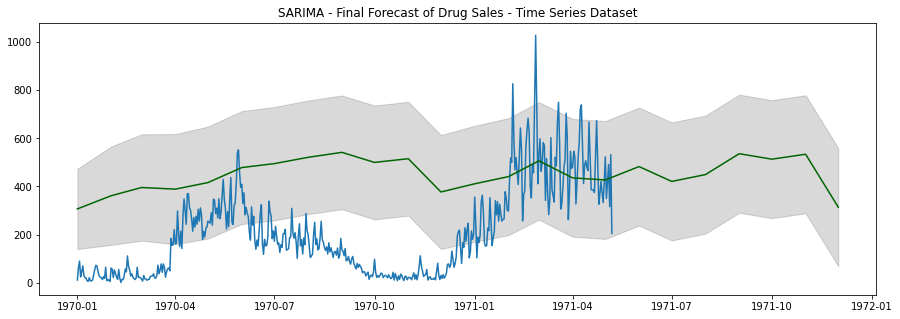

In [203]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.number_of_hits.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.number_of_hits)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [288]:
df1 = pd.read_excel("Book1.xlsx",sheet_name='Sheet4')
df2 = pd.read_excel("Book1.xlsx",sheet_name='Sheet5')

In [289]:
df_final = pd.DataFrame(columns=['date', 'hits', 'order'])

for index,value in df1.iterrows():
    orders = df2[df2['xaxis_label'] == value['xaxis_label']].number_of_orders
    if len(orders) > 0:
        orders = orders.values[0]
    else:
        orders = 0
    df_final.loc[index] = [value['xaxis_label'] , value['number_of_hits'] , orders] 
    


In [290]:

df_final.to_csv('linear_regression_dirty.csv',index=False)

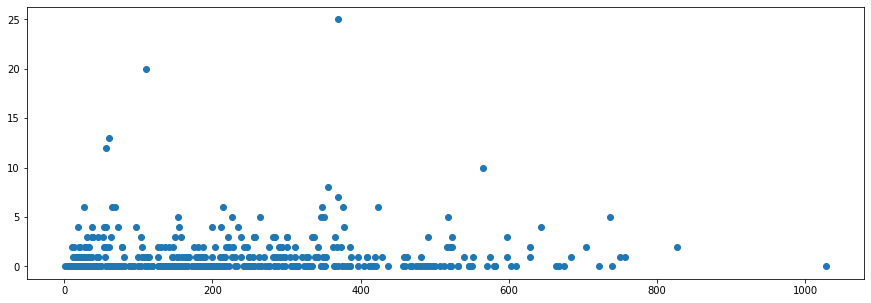

In [292]:
# reading data from the csv
data = pd.read_csv('linear_regression_dirty.csv')

# plotting the original values
x = data['hits'].tolist()
y = data['order'].tolist()
plt.scatter(x, y)